In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [19]:
# Assume that z[i][j] is above the limit
def topple(z, i, j, size, mode=4):
    queue = [(i, j)]
    visited = {(i, j)}

    if mode == 4:
        neighbours = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    elif mode == 8:
        neighbours = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Continue until there are no more updates
    while queue:
        i, j = queue.pop(0)
        if z[i][j] >= mode:
            z[i][j] -= mode

            # Check each of the neighbours
            for (di, dj) in neighbours:
                i_ = i + di
                j_ = j + dj
                if 0 <= i_ < size and 0 <= j_ < size:
                    z[i_][j_] += 1
                    if z[i_][j_] >= mode:
                        queue.append((i_, j_))
                        visited.add((i_, j_))       
    
    # Return the number of unique changed cells
    return len(visited)

In [20]:
# Plot one frame of the states
def plot_state(z, mode):
    plt.imshow(z, cmap='cividis', interpolation='nearest', vmin=0, vmax=mode-1)
    plt.colorbar()
    plt.axis('off')

# Add a slider to view the state at different iterations
def interactive_plot(zs, mode):
    def plot_frame(frame=0):
        plt.figure(figsize=(8, 8))
        plot_state(zs[frame], mode)
        plt.show()

    slider = widgets.IntSlider(value=0, min=0, max=len(zs)-1, step=1, description='Iteration')
    widgets.interact(plot_frame, frame=slider)

In [21]:
def sand_pile(size=100, mode=4, iterations=100):
    z = np.zeros((size, size))
    zs = [np.copy(z)] # Store the state for each iteration
    qs = [] # The number of updated pixels for each iteration

    for iter in range(iterations):
        # Input: Add 1 to a random grid location
        i = random.randint(0, size-1)
        j = random.randint(0, size-1)
        z[i][j] += 1

        # Propagation: If any location reaches the limit, subtract 4 and add 1 to each of its 4 neighbours
        # Repeat until no location has a value above the limit
        q = 0
        if z[i][j] >= mode:
            q = topple(z, i, j, size, mode=mode)
        qs += [q]
        zs += [np.copy(z)]

    return zs, qs

In [22]:
zs, qs = sand_pile(size=100, mode=4, iterations=30000)
interactive_plot(zs, mode=4)

interactive(children=(IntSlider(value=0, description='Iteration', max=30000), Output()), _dom_classes=('widget…

Equilibrium reached at iteration 21391


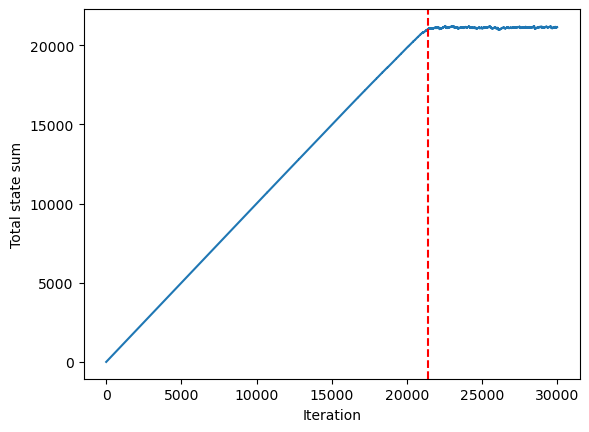

In [23]:
# Identify the ranges of iterations corresponding to the initial build-up (no topples) and equilibrium (SOC)
# Use the total state sum of z over all i, j as a function of n
z_sums = [np.sum(z) for z in zs]
z_max = np.max(z_sums)
equilibrium = -1
for i, z_sum in enumerate(z_sums):
    if z_sum >= z_max * 0.99:
        print(f'Equilibrium reached at iteration {i}')
        equilibrium = i
        break

plt.plot(z_sums)
plt.xlabel('Iteration')
plt.ylabel('Total state sum')
if equilibrium != -1:  # Ensure equilibrium was found
    plt.axvline(x=equilibrium, color='r', linestyle='--')
plt.show()

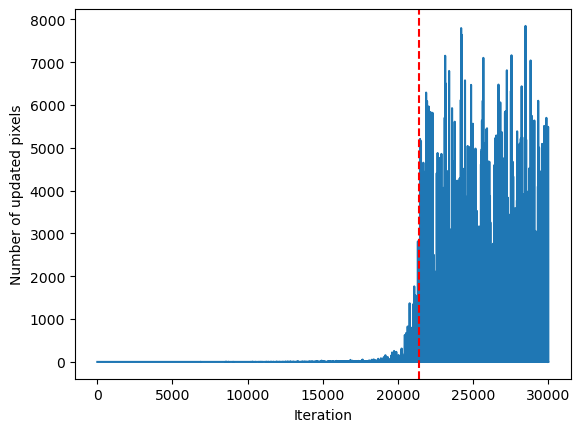

In [24]:
# Plot q as a function of n
plt.plot(qs)
plt.xlabel('Iteration')
plt.ylabel('Number of updated pixels')
if equilibrium != -1:
    plt.axvline(x=equilibrium, color='r', linestyle='--')
plt.show()

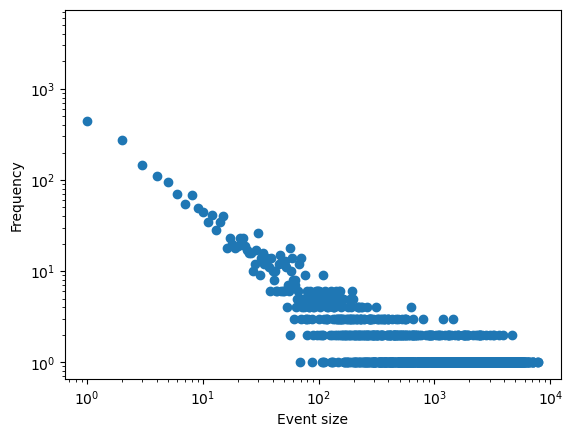

In [25]:
# Produce a log-log plot of the frequency of events in q as a function of the event size
# Note: Only use the values of q after equilibrium (don't include initial build-up)
q_eq = qs[equilibrium:]
event_sizes = np.unique(q_eq)
event_freqs = [np.sum(q_eq == event_size) for event_size in event_sizes]
plt.loglog(event_sizes, event_freqs, 'o')
plt.xlabel('Event size')
plt.ylabel('Frequency')
plt.show()